In [1]:
import pandas as pd
import numpy as np
import uuid
from datetime import datetime, timedelta
import random

In [2]:
import os

print(os.getcwd())

c:\Users\carlo\Documents\data-science-project\notebooks


In [3]:
os.chdir('C:/Users/carlo/Documents/data-science-project/')

In [4]:
# cargar datos
print("Cargando datos...")
df = pd.read_csv('data\cleaned_sales_data.csv', sep=';')
df.shape

Cargando datos...


(47950, 10)

In [5]:
df.head()

order_id  customer_id  product_id  quantity  \
0  53fb9b74-d43f-4d20-b56f-e90da2d14d4a       7271.0       923.0      10.0   
1  aae5d91c-3037-48a6-8208-05ae64154158        861.0       621.0      20.0   
2  a9c1f967-f9e5-4276-9994-d621957be8a8       5391.0       677.0       3.0   
3  8098059e-caf3-4117-93e9-483d89eadb0a       5192.0       370.0       9.0   
4  4a46ebfb-eb22-4b93-873c-bca7b8e16306       2416.0       771.0      15.0   

        price  order_date region  discount shipping_priority  ingreso_neto  
0  410.048837  2024-06-07   East  0.064040               Low   3837.894360  
1  466.519110  2023-01-29   East  0.021410               Low   9130.618725  
2   35.175263  2023-09-24   West  0.243724            Medium     79.806574  
3   75.551426  2023-08-11   West  0.272166               Low    494.899766  
4   61.812616  2024-08-09   East  0.269677              High    677.147807

La forma en que procedo es rústica, haciendo los cálculos agrupados y luego graficando

In [6]:
#formato de fecgha
df['order_date'] = pd.to_datetime(df['order_date'])

# obtención año mes
df['mes_anno'] = df['order_date'].dt.to_period('M')

# finalmente ingresos mensuales totales por región
ingresos_region = df.groupby(['mes_anno', 'region'])['ingreso_neto'].sum().reset_index()

In [ ]:
import plotly.express as px

# formateo del año mes
ingresos_region['mes_anno'] = ingresos_region['mes_anno'].dt.to_timestamp()

# gráfico por barras apiladas
fig = px.bar(ingresos_region, x='mes_anno', y='ingreso_neto', color='region',
             title='Ingresos Mensuales Totales por Región (Barras Apiladas)',
             labels={'mes_anno': 'Mes-Año', 'ingreso_neto': 'Ingreso Neto', 'region': 'Región'},
             barmode='stack')
fig.show()


Personalmente me gusta más plotly que matplotlib porque es interactivo. En cuanto al tipo de gráfico, al tratarse de regiones considero que las barras apiladas en este caso son las más adecuadas pues se asemejan a la participación porcentual de las regiones por mes. Lo cual me parece más intuitivo. Otro aspecto a ver es que aquí se comprueba que los datos sintéticos sí se crearon correctamente dado que se observa una tendencia creciente en los últimos meses. Por tro lado las distribuciones de las regiones en cuanto a ingresos mensuales se ven homogéneas exceptuando algunos casos.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47950 entries, 0 to 47949
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           47950 non-null  object        
 1   customer_id        47950 non-null  float64       
 2   product_id         47950 non-null  float64       
 3   quantity           47950 non-null  float64       
 4   price              47950 non-null  float64       
 5   order_date         47950 non-null  datetime64[ns]
 6   region             47950 non-null  object        
 7   discount           47950 non-null  float64       
 8   shipping_priority  47950 non-null  object        
 9   ingreso_neto       47950 non-null  float64       
 10  mes_anno           47950 non-null  period[M]     
 11  total_ingreso      47950 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3), period[M](1)
memory usage: 4.4+ MB


In [18]:
import pandas as pd
import plotly.express as px

#ingreso total calculado
df['total_ingreso'] = df['quantity'] * df['price']

ingresos_productos = df.groupby('product_id')['total_ingreso'].sum().reset_index()

ingresos_productos['product_id'] = ingresos_productos['product_id'].astype(str)

ingresos_productos['product_id'] = ingresos_productos['product_id'].astype(str)

top_10_productos = ingresos_productos.sort_values(by='total_ingreso', ascending=False).head(10)

fig = px.bar(top_10_productos, y='product_id', x='total_ingreso', 
             title='Top 10 Productos con Mayores Ingresos',
             labels={'product_id': 'Producto', 'total_ingreso': 'Ingreso Total'},
             color='total_ingreso',
             color_continuous_scale='Viridis',
             category_orders={'product_id': top_10_productos['product_id'].tolist()[::1]})

fig.show()

Se confirma el resultado obtenido en los análisis iniciales, donde 941 era el que lideraba el ranking de ingresos. En este caso se escoge un gráfico de barras vertical, dado que considero es la mejor manera de dar cuenta de un ranking.

In [19]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'price',
       'order_date', 'region', 'discount', 'shipping_priority', 'ingreso_neto',
       'mes_anno', 'total_ingreso'],
      dtype='object')

In [22]:
df.shipping_priority.value_counts()

shipping_priority
Medium    20525
High      14333
Low       13092
Name: count, dtype: int64

In [23]:
df.discount.value_counts()

discount
0.300000    2119
0.208936      62
0.148362      50
0.089204      50
0.029301      48
            ... 
0.243564       1
0.008322       1
0.173819       1
0.043926       1
0.032543       1
Name: count, Length: 45581, dtype: int64

In [24]:
import pandas as pd
import plotly.express as px

# calculo la media del descuento por prioridad de envío
media_descuento = df.groupby('shipping_priority')['discount'].mean().reset_index()

fig = px.bar(media_descuento, x='shipping_priority', y='discount', 
             title='Promedio de Descuento por Prioridad de Envío',
             labels={'shipping_priority': 'Prioridad de Envío', 'discount': 'Descuento Promedio'},
             color='discount', color_continuous_scale='Viridis')


fig.show()


fig_box = px.box(df, x='shipping_priority', y='discount',
                 title='Distribución de Descuento por Prioridad de Envío',
                 labels={'shipping_priority': 'Prioridad de Envío', 'discount': 'Descuento'})
fig_box.show()


Según lo observado no parece existir diferencia significativa (se puede profundizar con prueba de hipótesis para diferencia de medias) entre prioridades en términos de descuento. Ni el gráfico de barras ni los boxplot muestran mayores diferencias, por lo que no es concluyente poder decir que a mayor descuenta mayor es la prioridad de envío. 

In [ ]:
df['total_ingreso'] = df['quantity'] * df['price']  
df['mes_anno'] = pd.to_datetime(df['order_date']).dt.to_period('M')  


ingresos_mensuales_region['mes_anno'] = ingresos_mensuales_region['mes_anno'].astype(str)

fig_barras = px.bar(ingresos_mensuales_region, x='mes_anno', y='total_ingreso', color='region',
                    title='Ingresos Mensuales por Región',
                    labels={'mes_anno': 'Mes-Año', 'total_ingreso': 'Ingreso Total', 'region': 'Región'},
                    barmode='group')

fig_barras.show()


En este punto se observa más claramente la tendencia de largo plazo creciente y un patrón de estacionalidad en los meses de diciembre, dado que todas las regiones tuvieron unos mayores ingresos o ingresos superiores en dicho mes, tanto en 2023 como 2024, respecto a otros meses.

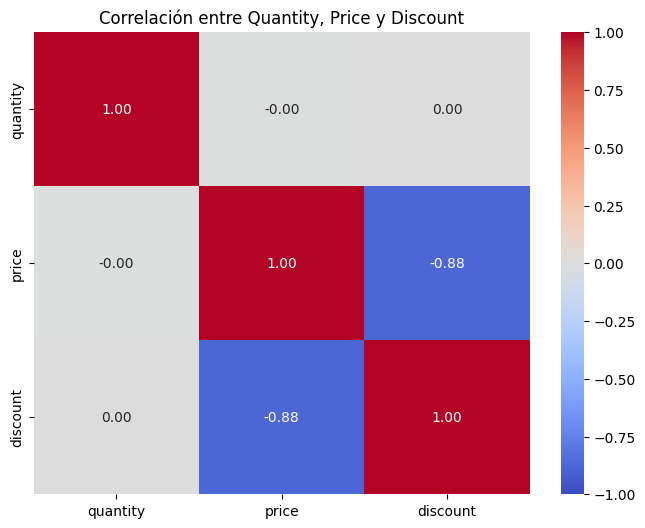

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#cáclulo correlación
correlation_matrix = df[['quantity', 'price', 'discount']].corr(method='kendall')


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlación entre Quantity, Price y Discount')
plt.show()

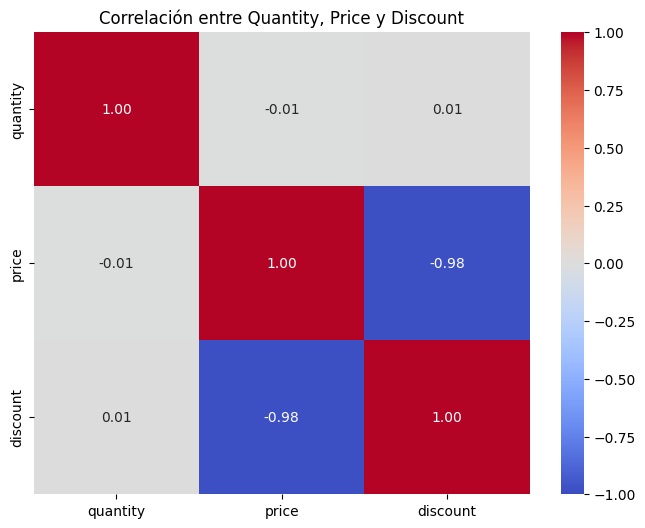

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
#cáclulo correlación
correlation_matrix = df[['quantity', 'price', 'discount']].corr(method='pearson')


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlación entre Quantity, Price y Discount')
plt.show()

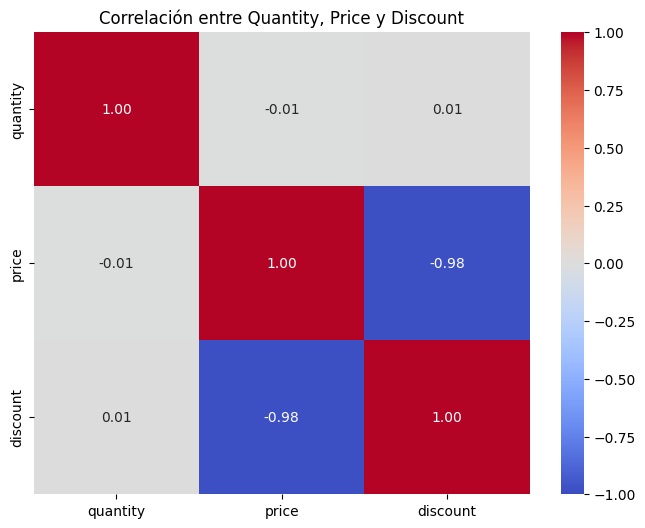

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
#cáclulo correlación
correlation_matrix = df[['quantity', 'price', 'discount']].corr(method='spearman')


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlación entre Quantity, Price y Discount')
plt.show()

Las correlaciones por pearson y spearman se observan muy similares, mientras que en Kendall si hay una menor correlación negativa entre precio y descuento. Ahora bien esa relación negativa alta entre precio y descuento podría deberse a que los productos de mayor precio son a los que menos descuentos se les quiere realizar, no es deseable para el vendedor, sí lo es para el cliente.

In [34]:
import plotly.express as px

fig = px.scatter(df, x='price', y='discount', title="Relación entre Price y Discount", 
                 labels={'price': 'Precio', 'discount': 'Descuento'})


fig.show()


Y con esta gráfica se comprueba, a mayor precio menor es el descuento que se le realiza el cliente.